In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [3]:
df

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


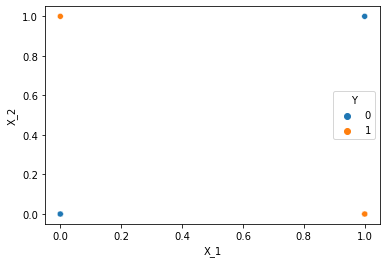

In [11]:
sns.scatterplot(x='X_1', y='X_2', hue='Y', data=df);

In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
clf

DecisionTreeClassifier(criterion='entropy')

In [6]:
X = df[['X_1', 'X_2']]
y = df['Y']

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
dogs_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv')

In [30]:
dogs_df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
dogs_df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [14]:
import math

In [37]:
def entropy(*, target_column, data):
    values = data[target_column].value_counts()
    N = len(data)
    res = 0
    
    for value in values:
        p = value / N
        res += p * math.log2(p)
    
    return -res
    
    
def info_gain(*, e0=1, feature, target_column, data):
    N = len(data)
    q = data[feature] > 0.5
    data_l, data_r = data[q], data[~q]
    E_l = entropy(target_column=target_column, data=data_l)
    E_r = entropy(target_column=target_column, data=data_r)
    return pd.Series({'entropy_left': E_l, 'entropy_right': E_r, 'info_gain': e0 - len(data_l) / N * E_l - len(data_r) / N * E_r})

In [38]:
for feature in dogs_df.columns[:len(dogs_df.columns) - 1]:
    print('Feature: {0}'.format(feature))
    print(info_gain(feature=feature, target_column='Вид', data=dogs_df), end='\n\n')

Feature: Шерстист
entropy_left     1.0
entropy_right    0.0
info_gain        0.0
dtype: float64

Feature: Гавкает
entropy_left    -0.0
entropy_right   -0.0
info_gain        1.0
dtype: float64

Feature: Лазает по деревьям
entropy_left    -0.0
entropy_right   -0.0
info_gain        1.0
dtype: float64



In [39]:
cats_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')

In [45]:
cats_df.drop('Unnamed: 0', axis=1, inplace=True)

In [46]:
cats_df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [51]:
e0 = entropy(target_column='Вид', data=cats_df)
print(e0)

for feature in cats_df.columns[:len(cats_df.columns) - 1]:
    print('Feature: {0}'.format(feature))
    print(info_gain(e0=e0, feature=feature, target_column='Вид', data=cats_df), end='\n\n')

0.9709505944546686
Feature: Шерстист
entropy_left     0.991076
entropy_right   -0.000000
info_gain        0.078982
dtype: float64

Feature: Гавкает
entropy_left     0.721928
entropy_right   -0.000000
info_gain        0.609987
dtype: float64

Feature: Лазает по деревьям
entropy_left    -0.000000
entropy_right   -0.000000
info_gain        0.970951
dtype: float64



In [4]:
iris_train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')

In [5]:
iris_test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [6]:
iris_train_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [7]:
iris_test_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [12]:
X_train, y_train, X_test, y_test = iris_train_data.drop(['Unnamed: 0', 'species'], axis=1), iris_train_data['species'], iris_test_data.drop(['Unnamed: 0', 'species'], axis=1), iris_test_data['species']

In [16]:
X_train.head()

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5


In [36]:
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [47]:
max_tree_depth = 100
depth_values = range(1, max_tree_depth)
scores_data = pd.DataFrame()
np.random.seed(0)

In [49]:
for depth in depth_values:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    scores_data = scores_data.append(pd.DataFrame({'train_score': [train_score], 'test_score': [test_score], 'max_depth': depth}))

In [50]:
scores_data.head()

,train_score,test_score,max_depth
0,0.70,0.60,1
0,0.97,0.94,2
0,0.99,0.94,3
0,1.00,0.92,4
0,1.00,0.92,5


In [51]:
scores_data = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], var_name='score_type', value_name='score')

In [52]:
scores_data.head()

,max_depth,score_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


In [53]:
scores_data.query('score_type == "test_score"')

,max_depth,score_type,score
198,1,test_score,0.60
199,2,test_score,0.94
200,3,test_score,0.94
201,4,test_score,0.92
202,5,test_score,0.92
...,...,...,...
391,95,test_score,0.92
392,96,test_score,0.92
393,97,test_score,0.92
394,98,test_score,0.92


In [54]:
sns.set(rc={'figure.figsize': (12, 8)})

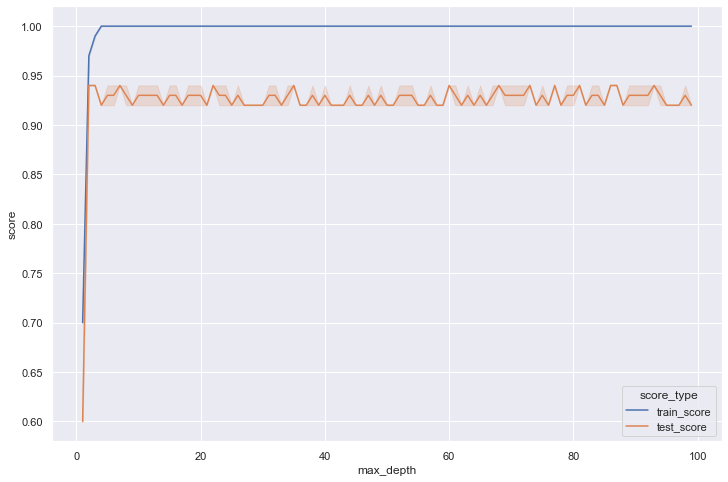

In [55]:
sns.lineplot(x='max_depth', y='score', hue='score_type', data=scores_data);

In [58]:
clf.decision_path(X_test)

<50x9 sparse matrix of type '<class 'numpy.int64'>'
	with 158 stored elements in Compressed Sparse Row format>

In [3]:
songs_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [4]:
songs_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import precision_score

In [6]:
X = songs_data[['length', 'commas', 'exclamations', 'colons', 'hyphens']]
y = songs_data['artist']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 5) (119, 5) (241,) (119,)


In [8]:
clf = tree.DecisionTreeClassifier()

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [21]:
y_pred

array(['blind-guardian', 'abba', 'abba', 'gangstarr', 'abba',
       'blind-guardian', 'blind-guardian', 'abba', 'abba', 'abba', 'abba',
       'gangstarr', 'gangstarr', 'blind-guardian', 'abba', 'abba',
       'gangstarr', 'abba', 'abba', 'abba', 'abba', 'abba', 'abba',
       'gangstarr', 'abba', 'abba', 'gangstarr', 'blind-guardian', 'abba',
       'abba', 'gangstarr', 'abba', 'abba', 'abba', 'gangstarr', 'abba',
       'abba', 'gangstarr', 'gangstarr', 'gangstarr', 'abba',
       'blind-guardian', 'abba', 'gangstarr', 'abba', 'blind-guardian',
       'abba', 'blind-guardian', 'abba', 'abba', 'blind-guardian',
       'blind-guardian', 'blind-guardian', 'gangstarr', 'abba', 'abba',
       'abba', 'abba', 'gangstarr', 'gangstarr', 'gangstarr',
       'blind-guardian', 'blind-guardian', 'abba', 'abba', 'abba',
       'gangstarr', 'abba', 'blind-guardian', 'blind-guardian',
       'gangstarr', 'blind-guardian', 'abba', 'abba', 'abba',
       'blind-guardian', 'abba', 'abba', 'gangstarr'

In [22]:
precision_score(y_test, y_pred, average='micro')

0.6638655462184874